<a href="https://colab.research.google.com/github/stgoa/recursiveseriation/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Optimal Algorithm for Strict Circular Seriation

Author: Santiago Armstrong

About this repository:

This repository contains a Python implementation of the algorithm introduced in the paper '*An Optimal Algorithm for Strict Circular Seriation*'. Check the preprint on [ArXiv][1]

**Abstract:**

We study the problem of circular seriation, where we are given a matrix of pairwise dissimilarities between n objects, and the goal is to find a *circular order* of the objects in a manner that is consistent with their dissimilarity. This problem is a generalization of the classical *linear seriation* problem where the goal is to find a *linear order*, and for which optimal $O(n^2)$ algorithms are known. Our contributions can be summarized as follows. First, we introduce *circular Robinson matrices* as the natural class of dissimilarity matrices for the circular seriation problem. Second, for the case of *strict circular Robinson dissimilarity matrices* we provide an optimal $O(n^2)$ algorithm for the circular seriation problem. Finally, we propose a statistical model to analyze the well-posedness of the circular seriation problem for large n. In particular, we establish $O(log(n)/n)$ rates on the distance between any circular ordering found by solving the circular seriation problem to the underlying order of the model, in the Kendall-tau metric.



[1]: https://arxiv.org/abs/2106.05944

If you want to run this in Google Colab, make sure to clone the repository:

    !git clone https://github.com/stgoa/recursiveseriation.git
    %cd recursiveseriation

In [1]:
%ls

example_points_in_circle.ipynb  minimal_example.ipynb


## Minimal example

In [2]:
from recursiveseriation.seriation import RecursiveSeriation
from recursiveseriation.utils import  (random_permutation, inpermute, permute, inversepermutation)
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)
np.random.seed(42)

In [3]:
points_in_circle = [[np.cos(2*np.pi*x), np.sin(2*np.pi*x)] for x in np.linspace(0,1,100)]

In [4]:
pi = random_permutation(len(points_in_circle))
tau =inversepermutation(pi) # inverse of the unknown permutation
points_in_circle = permute(points_in_circle, pi)

In [5]:
D = np.zeros((len(points_in_circle), len(points_in_circle)))

for i in range(len(points_in_circle)):
    for j in range(len(points_in_circle)):
        D[i, j] = np.linalg.norm(
            np.asarray(points_in_circle[i])
            - np.asarray(points_in_circle[j])
        )

In [6]:
n = len(D)
D = permute(D,pi) # permute the dissimilarity matrix by the random permutation

Text(0.5, 1.0, 'Input distance matrix')

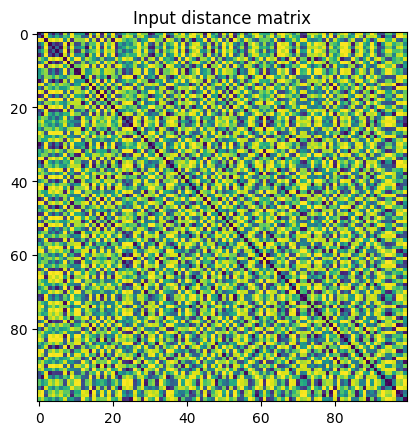

In [7]:
plt.imshow(D)
plt.title("Input distance matrix")

In [8]:
print("Running algorithm...")

rs = RecursiveSeriation(dissimilarity=lambda x,y: D[x,y], n=n)
order = rs.sort()
print("Finished!")

Running algorithm...
Finished!


In [9]:
print("tau", tau)
print("recovered ordering", order)

tau [9, 84, 87, 51, 15, 35, 56, 42, 54, 28, 8, 30, 18, 49, 97, 25, 39, 52, 10, 45, 94, 86, 6, 88, 50, 47, 22, 44, 33, 83, 11, 19, 77, 13, 41, 38, 58, 82, 53, 5, 26, 71, 23, 63, 4, 3, 66, 31, 73, 40, 64, 99, 85, 1, 62, 20, 60, 75, 72, 79, 95, 68, 48, 80, 57, 37, 36, 65, 67, 24, 2, 96, 29, 12, 91, 76, 16, 17, 55, 70, 7, 46, 93, 0, 81, 32, 92, 89, 21, 59, 14, 90, 98, 34, 78, 43, 27, 69, 74, 61]
recovered ordering [98, 77, 46, 9, 34, 66, 42, 2, 20, 52, 39, 16, 90, 18, 83, 27, 87, 50, 65, 37, 58, 82, 75, 7, 73, 67, 43, 70, 29, 76, 95, 94, 48, 84, 32, 61, 57, 26, 12, 19, 36, 51, 15, 80, 88, 96, 22, 35, 1, 93, 72, 53, 71, 49, 17, 45, 30, 0, 13, 4, 6, 31, 64, 21, 56, 92, 78, 3, 8, 85, 5, 47, 69, 40, 10, 11, 54, 33, 62, 23, 60, 38, 25, 99, 89, 81, 28, 68, 91, 24, 44, 63, 55, 41, 74, 14, 97, 79, 86, 59]


Text(0.5, 1.0, 'Reordered distance matrix')

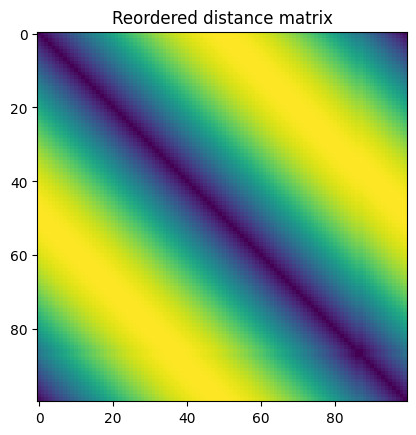

In [10]:
D_rec = permute(D,order)
plt.imshow(D_rec)
plt.title("Reordered distance matrix")